# Exercise 1: Exploratory Data Analysis


## Introducción:

Para el siguiente ejercicio definiremos once funciones destinadas al analisis exploratorio de datos. La definición de tales funciones sera esencial para esta tarea, ya que las funciones que definamos, serán usadas en los ejercicios que siguen de este.

Aquí solo declaramos la paquetería.

In [1]:
import Pkg 

#Pkg.add("IJulia")
#Pkg.build("IJulia")

#=Pkg.Registry.rm("General")
Pkg.Registry.add("General")
Pkg.update()

Pkg.activate(".")=#

#Pkg.Registry.add("General")
Pkg.add("CSV")
Pkg.add("Plots")

import Pkg; Pkg.offline(true)


using CSV, DataFrames, Statistics, Plots 

    Updating registry at `C:\Users\USER\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\USER\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\USER\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\USER\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\USER\.julia\environments\v1.11\Manifest.toml`


### Lectura del CSV

Usamos **DataFrame(CSV.File(file.csv))** para crear nuestro bootle_df.<br>
De manera adicional, podemos usar first(df, n) para verificar que se haya leído correctamente el archivo.

In [4]:
# Obtenemos la ruta de la carpeta src
dir_src = @__DIR__
dir_base = joinpath(dir_src, "..")
dir_dat = joinpath(dir_base, "dat")
ruta_datos = joinpath(dir_dat, "bottle.csv")

bottle_df = DataFrame(CSV.File(ruta_datos));
#println(first(bottle_df,10))


864863×74 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 864857 │   34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…     ⋯
 864858 │   34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864859 │   34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864860 │   34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864861 │   34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
 864862 │   34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864863 │   34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
                                              70 columns and 864848 rows omitted

### 1, 2 dataShape y dataType<br>

Para los primeros 2 puntos del ejercicio:


1. **dataShape**: to get shape of the data
2. **dataType**: gives data type of each column in the dataset

Usamos la funcion ya definida "**size(df)**" que regresa las dimensiones de las filas y columnas.<br>
Y **eltype.(eachcol(df))**, lo que hace es que **eachcol(df)** recorre cada columna del dataframe y **eltype()**, regresa el tipo de cada una.


In [5]:
println(size(bottle_df))
println(names(bottle_df))
println(eltype.(eachcol(bottle_df)))


#counter_total = sum(counter(file,"ipsum") for file in matches)


(864863, 74)
["Cst_Cnt", "Btl_Cnt", "Sta_ID", "Depth_ID", "Depthm", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "BtlNum", "RecInd", "T_prec", "T_qual", "S_prec", "S_qual", "P_qual", "O_qual", "SThtaq", "O2Satq", "ChlorA", "Chlqua", "Phaeop", "Phaqua", "PO4uM", "PO4q", "SiO3uM", "SiO3qu", "NO2uM", "NO2q", "NO3uM", "NO3q", "NH3uM", "NH3q", "C14As1", "C14A1p", "C14A1q", "C14As2", "C14A2p", "C14A2q", "DarkAs", "DarkAp", "DarkAq", "MeanAs", "MeanAp", "MeanAq", "IncTim", "LightP", "R_Depth", "R_TEMP", "R_POTEMP", "R_SALINITY", "R_SIGMA", "R_SVA", "R_DYNHT", "R_O2", "R_O2Sat", "R_SIO3", "R_PO4", "R_NO3", "R_NO2", "R_NH4", "R_CHLA", "R_PHAEO", "R_PRES", "R_SAMP", "DIC1", "DIC2", "TA1", "TA2", "pH2", "pH1", "DIC Quality Comment"]
Type[Int64, Int64, String15, String, Int64, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int64}, Int64, Union{Missing, Int64}, Un

### 3. count_missing(col)

Para definir la funcion **count_missing(col)**, usamos la funcion **count()**, pasando como argumento '*ismissing*' y la columna sobre la que se va a aplicar.

In [6]:
function count_missing(col)
    count(ismissing,col)
end

println(count_missing(bottle_df.Depthm))
println(count_missing(bottle_df.T_qual))
println(length(bottle_df.T_qual))
#print(bottle_df.Depthm)

0
841736
864863


### 4. dataMissingPercentage(col)

Definimos la función, haciendo uso de **count_missing** para obtener el numero de de valores nulos y se divide sobre el largo de la columa <br>


In [7]:
function missing_percentage(col)
    count_missing(col)/length(col)*100
end

println(missing_percentage(bottle_df.Depthm))
println(missing_percentage(bottle_df.T_qual))


0.0
97.32593485904704


### 5. deleteColumns(df, threshold)

Definimos una lista **cols_to_delete** como una sentencia que solo guarda el nombre de las columnas tales que su **missing_percentage**<br>
es mayor que el threshold. <br>
<br>
Despues usamos **select!()** para **no** seleccionar las columnas en **cols_to_delete**.

In [8]:
function deleteColumns(df, threshold)

    #qui solo tengo una lista
    cols_to_delete = [col for col in names(df) if missing_percentage(df[!,col]) > threshold]

    #aqui las elimino de verdad
    select!(df, Not(cols_to_delete))
end


println(names(bottle_df))
deleteColumns(bottle_df,50)
println(names(bottle_df))

["Cst_Cnt", "Btl_Cnt", "Sta_ID", "Depth_ID", "Depthm", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "BtlNum", "RecInd", "T_prec", "T_qual", "S_prec", "S_qual", "P_qual", "O_qual", "SThtaq", "O2Satq", "ChlorA", "Chlqua", "Phaeop", "Phaqua", "PO4uM", "PO4q", "SiO3uM", "SiO3qu", "NO2uM", "NO2q", "NO3uM", "NO3q", "NH3uM", "NH3q", "C14As1", "C14A1p", "C14A1q", "C14As2", "C14A2p", "C14A2q", "DarkAs", "DarkAp", "DarkAq", "MeanAs", "MeanAp", "MeanAq", "IncTim", "LightP", "R_Depth", "R_TEMP", "R_POTEMP", "R_SALINITY", "R_SIGMA", "R_SVA", "R_DYNHT", "R_O2", "R_O2Sat", "R_SIO3", "R_PO4", "R_NO3", "R_NO2", "R_NH4", "R_CHLA", "R_PHAEO", "R_PRES", "R_SAMP", "DIC1", "DIC2", "TA1", "TA2", "pH2", "pH1", "DIC Quality Comment"]
["Cst_Cnt", "Btl_Cnt", "Sta_ID", "Depth_ID", "Depthm", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "RecInd", "T_prec", "S_prec", "P_qual", "Chlqua", "Phaqua", "PO4q", "SiO3qu", "NO2q", "NO3q", "NH3q", "C14A1q", "C14A2q", "DarkAq", "MeanAq", "

### 6. calculateCorrelation(df)

Obtenemos una lista de las columnas numericas como **numerical_columns** mediante un filtro que verifica si el tipo de cada columna <br>
pertenece al tipo **Number**. despues usa la funcion **cor** y **Matrix**, para obtener la matriz de correlacion en terminos de **numerical_columns**.

In [9]:
function calulateCorrelation(df)

    numerical_columns = [col for col in names(df) if eltype(df[!,col]) <: Number]

    return cor(Matrix(df[:,numerical_columns]))
end

calulateCorrelation(bottle_df)


6×6 Matrix{Float64}:
  1.0        0.999345  -0.162222   -0.100142   -0.16222    -0.161961
  0.999345   1.0       -0.161617   -0.100828   -0.161614   -0.161348
 -0.162222  -0.161617   1.0         0.0823158   1.0         0.999994
 -0.100142  -0.100828   0.0823158   1.0         0.0823171   0.0821835
 -0.16222   -0.161614   1.0         0.0823171   1.0         0.999994
 -0.161961  -0.161348   0.999994    0.0821835   0.999994    1.0

### 7. displayCorrelation()

Usamos la función **heatmap** del paquete **Plots**, junto a nuestra función **calculateCorrelation** de la siguiente manera:<br>
<br>

1. Obtenemos los coeficientes de correlacion, en forma de matriz, mediante **calulateCorrelation(bottle_df)**.
2. Definimos las entradas del eje **X** y **Y** mediante las entradas de **numerical_columns**.
3. Asignamos una paleta de colores al *heatmap*.
4. Guardamos a la carpeta mediante **savefig**.

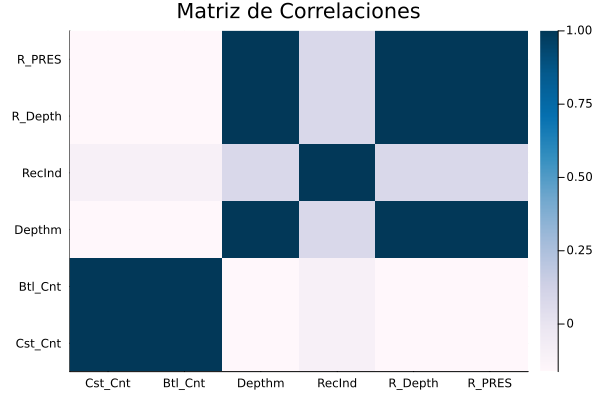

In [10]:
numerical_columns = [col for col in names(bottle_df) if eltype(bottle_df[!,col]) <: Number]

plot_obj  = heatmap(
    calulateCorrelation(bottle_df),
    xticks=(1:6, numerical_columns),  # Etiquetas en el eje x
    yticks=(1:6, numerical_columns),  # Etiquetas en el eje y
    color=:PuBu         ,
    title="Matriz de Correlaciones"
)

dir_src = @__DIR__
dir_base = joinpath(dir_src, "..")
dir_fig = joinpath(dir_base, "fig")

savefig(joinpath(dir_fig, "Matriz_de_Correlaciones.png"))
plot_obj

### 8. removeOutliersIQR(df)

Pa definir la funcion, volvemos a usar **numerical_columns** (que no tendria sentido hacerlo para columnas no numéricas) y para cada<br>
columna en **numerical_columns** definimos sus cuantiles **1** y **3**, mediente la funcion **quantile()**. Definimos **low_lim** y **upp_lim**<br>
como los cuartiles (segun corresponda) mas/menos **1.5** veces (por convención) el rango intercuartil.<br>
<br>

Depues solo aplicamos un **filter** para quellos valores que salgan del rango definido.


In [11]:
function removeOutliersIQR(df)

    numerical_columns = [col for col in names(df) if eltype(df[!,col]) <: Number]

    for col in numerical_columns
        q1, q3 = quantile(df[!,col],[0.25,0.75])
        iqr = q3 - q1

        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr

        df = filter(row -> low_lim <= row[col] <= upp_lim, df)
    end  
    return df  
end


#=
function removeOutliersIQRColumnwise!(df)
    numerical_columns = [col for col in names(df) if eltype(df[!, col]) <: Number]

    for col in numerical_columns
        # Calcular IQR y límites para la columna
        q1, q3 = quantile(df[!, col], [0.25, 0.75])
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr

        # Reemplazar outliers por `missing`
        replace!(df[!, col], x -> x < low_lim || x > upp_lim ? missing : x)
    end

    return df
end
=#
removeOutliersIQR(bottle_df);


### 9. deleteRow(column)

Aquí solo usamos la función pre existente **dropmissing!(df, :column_name)**, lo que hace es tomar un dataframe y una columna y elimina las entradas<br>
con valores nulos.<br>
<br>
Hacemos una impresión de largo del df antes y despues de ejecutar la función para asegurarnos de que se modificó correctamente el df.

In [12]:
#usamos funcion existente
#dropmissing!(df, :column_name) #se puede hacer [:A,:B, ....]

println(size(bottle_df,1))
dropmissing!(bottle_df,"T_prec")
println(size(bottle_df,1))

864863
853900


### 10. filterColumnsByCorrelation(df,target::String, threshold::Float64, relation::String)

Definimos la función **filterColumnsByCorrelation()** mediante **numerical_columns** y **calculateCorrrelation(df)**. Al recivir un *target* la función<br>
verifica que este en **numerical_columns**, en caso de que no, acaba la ejecución.<br>
<br>
Despues, definimos **target_index** como el lugar que *target* ocupa en **numerical_columns** (mediante un **findfirst**), y luego usamos ese indice para<br>
tomar los valores que nos interesan de la matriz de correlación. Mediante una funcion lambda, definimos los casos en los que la relacion es *positiva*, <br>
*negativa* o *ambas*.<br>
<br>
Finalmente creamos la lista **filtered_columns** como aquellas columnas en **numerical_columns** tales que dada una *relación* cumplen con lo definido en<br> 
**select_relation** y son diferente al *target*. Despues, solo se usa **select!** para eliminar las columnas que cumplen con el criterio dado.





In [13]:

function filterColumnsByCorrelation(df,target::String, threshold::Float64, relation::String)
    
    correlation_matrix = calulateCorrelation(df)
    numerical_columns = [col for col in names(df) if eltype(df[!, col]) <: Number]
    #= println("numerical_columns generado: ", numerical_columns)
    println("Tipo de numerical_columns: ", typeof(numerical_columns))
    println("Tipos de los elementos: ", [typeof(col) for col in numerical_columns])=#
    
    # Verificamos que la columna objetivo (target) sea numérica y válida
    if !(target in numerical_columns)
        println("La columna objetivo '$target' debe ser numérica y válida.  
        Trata con alguna de las siguientes columnas: $(join(numerical_columns, ", "))")
        return
    end
    
    target_index = findfirst(numerical_columns .== target)
    correlations = correlation_matrix[:, target_index]

    select_relation = relation == "positive" ?
                      x -> x >= threshold :
                      relation == "negative" ?
                      x -> x <= -threshold :
                      relation == "both" ? 
                      x -> abs(x) >= threshold :
                      error("Relación no válida: usa 'positive', 'negative' o 'both'")


    filtered_columns = [numerical_columns[i] for i in 1:length(correlations) if select_relation(correlations[i])  && names(df)[i] != target]
    println("Columnas a eliminar: $(join(filtered_columns, ", "))")

    #si quiero borrar todas las columnas de filtered_columns
    select!(df, Not(filtered_columns))

return filtered_columns

end


 

filterColumnsByCorrelation(bottle_df, "Depth_ID", 0.5, "positive")

filterColumnsByCorrelation(bottle_df, "R_Depth", 0.1, "positive")

filterColumnsByCorrelation(bottle_df, "R_Depth", 0.1, "negative")

filterColumnsByCorrelation(bottle_df, "R_Depth", 0.1, "both")

print(names(bottle_df))


La columna objetivo 'Depth_ID' debe ser numérica y válida.  
        Trata con alguna de las siguientes columnas: Cst_Cnt, Btl_Cnt, Depthm, RecInd, T_prec, R_Depth, R_PRES
Columnas a eliminar: Depthm, R_Depth, R_PRES
La columna objetivo 'R_Depth' debe ser numérica y válida.  
        Trata con alguna de las siguientes columnas: Cst_Cnt, Btl_Cnt, RecInd, T_prec
La columna objetivo 'R_Depth' debe ser numérica y válida.  
        Trata con alguna de las siguientes columnas: Cst_Cnt, Btl_Cnt, RecInd, T_prec
["Cst_Cnt", "Btl_Cnt", "Sta_ID", "Depth_ID", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "RecInd", "T_prec", "S_prec", "P_qual", "Chlqua", "Phaqua", "PO4q", "SiO3qu", "NO2q", "NO3q", "NH3q", "C14A1q", "C14A2q", "DarkAq", "MeanAq", "R_TEMP", "R_POTEMP", "R_SALINITY", "R_SIGMA", "R_SVA", "R_DYNHT", "R_O2", "R_O2Sat"]

### 11. describe()

Usamos la funcion pre existente describe(df).

In [14]:
describe(bottle_df)

33×7 DataFrame
 Row │ variable     mean       min                                median     m ⋯
     │ Symbol       Union…     Any                                Union…     A ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt      17203.6    1                                  16956.0    3 ⋯
   2 │ Btl_Cnt      4.34026e5  1                                  4.34186e5  8
   3 │ Sta_ID                  001.0 168.0                                   1
   4 │ Depth_ID                19-4903CR-HY-060-0930-05400560-0…             2
   5 │ T_degC       10.7997    1.44                               10.06      3 ⋯
   6 │ Salnty       33.8413    28.431                             33.866     3
   7 │ O2ml_L       3.38285    -0.01                              3.42       1
   8 │ STheta       25.8194    20.934                             25.996     2
  ⋮  │      ⋮           ⋮                      ⋮                      ⋮        ⋱
  27 │ R_POTEMP     10.8423    0.0                                10.1       3 ⋯
  28 │ R_SALINITY   33.8413    4.57                               33.866     3
  29 │ R_SIGMA      25.811     20.934                             25.99      2
  30 │ R_SVA        220.939    0.4                                203.2      6
  31 │ R_DYNHT      0.432876   0.0                                0.34       3 ⋯
  32 │ R_O2         3.38288    -0.01                              3.42       1
  33 │ R_O2Sat      57.1168    -0.1                               54.4       2
                                                   3 columns and 18 rows omitted